In [1]:
from analysis import time_all_search_algos, weighted_adjacency_matrix
import matplotlib.pyplot as plt
from bfs import bfs
from dfs import dfs
from greedy_search import greedy_search, h_sum_neighbors, h_min_neighbor

### timing all the search algorithms

In [2]:
# getting results for 1000 runs from arad to bucharest for all search algorithms
arad_to_bucharest = time_all_search_algos("Arad", "Bucharest")

Timing search algorithms from Arad to Bucharest...
BFS took 0.005219 seconds for 1000 runs with nodes expanded: 9 and path: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu Vilcea', 'Lugoj', 'Bucharest']
DFS took 0.004075 seconds for 1000 runs with nodes expanded: 8 and path: ['Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 'Craiova', 'Pitesti', 'Bucharest']
Greedy (sum heuristic) took 0.005250 seconds for 1000 runs with nodes expanded: 4 and path: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']
Greedy (min heuristic) took 0.004679 seconds for 1000 runs with nodes expanded: 4 and path: ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']


In [3]:
sibiu_to_lugoj = time_all_search_algos("Sibiu", "Lugoj")

Timing search algorithms from Sibiu to Lugoj...
BFS took 0.005564 seconds for 1000 runs with nodes expanded: 11 and path: ['Sibiu', 'Oradea', 'Arad', 'Fagaras', 'Rimnicu Vilcea', 'Zerind', 'Timisoara', 'Bucharest', 'Craiova', 'Pitesti', 'Lugoj']
DFS took 0.005812 seconds for 1000 runs with nodes expanded: 15 and path: ['Sibiu', 'Rimnicu Vilcea', 'Pitesti', 'Bucharest', 'Urziceni', 'Vaslui', 'Iasi', 'Neamt', 'Hirsova', 'Eforie', 'Giurgiu', 'Craiova', 'Drobeta', 'Mehadia', 'Lugoj']
Greedy (sum heuristic) took 0.011092 seconds for 1000 runs with nodes expanded: 10 and path: ['Sibiu', 'Arad', 'Timisoara', 'Lugoj']
Greedy (min heuristic) took 0.024411 seconds for 1000 runs with nodes expanded: 35 and path: ['Sibiu', 'Arad', 'Timisoara', 'Lugoj']


In [4]:
giurgiu_to_neamt = time_all_search_algos("Giurgiu", "Neamt")

Timing search algorithms from Giurgiu to Neamt...
BFS took 0.008901 seconds for 1000 runs with nodes expanded: 19 and path: ['Giurgiu', 'Bucharest', 'Fagaras', 'Pitesti', 'Urziceni', 'Sibiu', 'Rimnicu Vilcea', 'Craiova', 'Hirsova', 'Vaslui', 'Oradea', 'Arad', 'Drobeta', 'Eforie', 'Iasi', 'Zerind', 'Timisoara', 'Mehadia', 'Neamt']
DFS took 0.002619 seconds for 1000 runs with nodes expanded: 6 and path: ['Giurgiu', 'Bucharest', 'Urziceni', 'Vaslui', 'Iasi', 'Neamt']
Greedy (sum heuristic) took 0.011253 seconds for 1000 runs with nodes expanded: 11 and path: ['Giurgiu', 'Bucharest', 'Urziceni', 'Vaslui', 'Iasi', 'Neamt']
Greedy (min heuristic) took 0.009987 seconds for 1000 runs with nodes expanded: 13 and path: ['Giurgiu', 'Bucharest', 'Urziceni', 'Vaslui', 'Iasi', 'Neamt']


In [5]:
# testing with a non existent city, should return empty list.
giurgiu_to_nonexistent = time_all_search_algos("Giurgiu", "NoCity")

Timing search algorithms from Giurgiu to NoCity...
BFS took 0.009484 seconds for 1000 runs with nodes expanded: 20 and path: []
DFS took 0.008096 seconds for 1000 runs with nodes expanded: 20 and path: []
Greedy (sum heuristic) took 0.032751 seconds for 1000 runs with nodes expanded: 47 and path: []
Greedy (min heuristic) took 0.026729 seconds for 1000 runs with nodes expanded: 47 and path: []


### plotting the time results of each algorithm

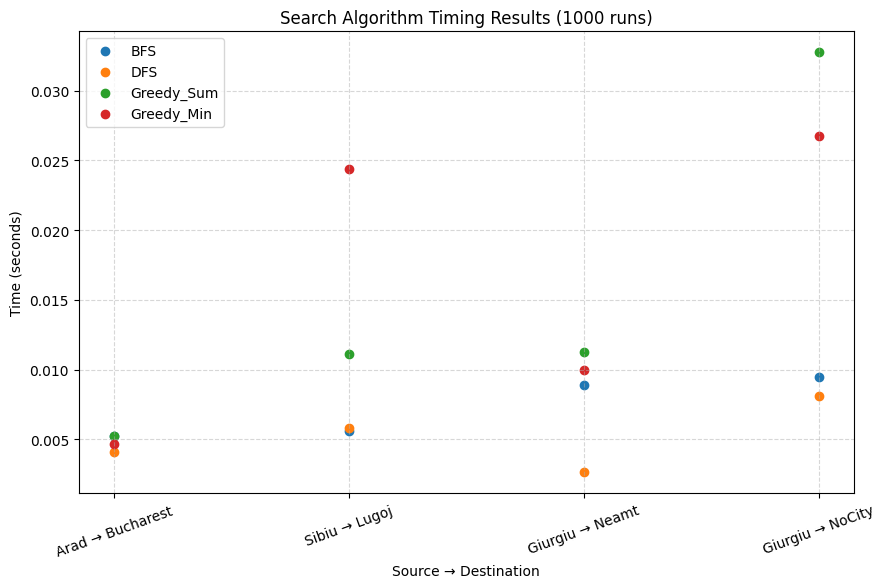

In [11]:
all_results = {
    "Arad → Bucharest": arad_to_bucharest,
    "Sibiu → Lugoj": sibiu_to_lugoj,
    "Giurgiu → Neamt": giurgiu_to_neamt,
    "Giurgiu → NoCity": giurgiu_to_nonexistent,
}

styles = {
    "BFS": {"color": "tab:blue"},
    "DFS": {"color": "tab:orange"},
    "Greedy_Sum": {"color": "tab:green"},
    "Greedy_Min": {"color": "tab:red"},
}

plt.figure(figsize=(10, 6))

for city_pair, algo_times in all_results.items():
    for algo, time in algo_times.items():
        plt.scatter(
            city_pair,
            time,
            color=styles[algo]["color"],
            label=algo,
        )

# Only show each algorithm once in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Search Algorithm Timing Results (1000 runs)")
plt.xlabel("Source → Destination")
plt.ylabel("Time (seconds)")
plt.xticks(rotation=20)
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()